In [34]:
!pip install shap

In [35]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [36]:
import io

In [37]:
from google.colab import files
uploaded = files.upload()

Saving TSM.csv to TSM.csv


In [38]:
df= pd.read_csv(io.BytesIO(uploaded['TSM.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0      1/4/2010  11.490000  11.690000  11.470000  11.580000   7.458041   
1      1/5/2010  11.600000  11.660000  11.460000  11.530000   7.425838   
2      1/6/2010  11.560000  11.610000  11.380000  11.490000   7.400078   
3      1/7/2010  11.410000  11.440000  11.070000  11.110000   7.155339   
4      1/8/2010  11.140000  11.220000  11.030000  11.100000   7.148899   
...         ...        ...        ...        ...        ...        ...   
2635  6/23/2020  56.639999  57.160000  56.529999  56.759998  53.146317   
2636  6/24/2020  56.709999  57.060001  56.160000  56.580002  52.977772   
2637  6/25/2020  56.560001  57.090000  55.950001  57.040001  53.408482   
2638  6/26/2020  57.000000  57.259998  56.209999  56.330002  52.743690   
2639  6/29/2020  56.340000  56.410000  55.660000  56.389999  52.799870   

        Average  
0     10.737608  
1     10.735168  
2     10.688016  
3     10.437068  
4     10.327780  
...

In [39]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Average
0,11.49,11.69,11.47,11.58,7.458041,10.737608
1,11.60,11.66,11.46,11.53,7.425838,10.735168
2,11.56,11.61,11.38,11.49,7.400078,10.688016
3,11.41,11.44,11.07,11.11,7.155339,10.437068
4,11.14,11.22,11.03,11.10,7.148899,10.327780


In [40]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x = df.drop("Average", axis = 1)
y = df.Close
y = y.astype('int')

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        10
          14       1.00      0.94      0.97        18
          15       0.92      1.00      0.96        12
          16       1.00      1.00      1.00        12
          17       1.00      1.00      1.00        20
          18       1.00      1.00      1.00        12
          19       1.00      1.00      1.00        12
          20       0.92      1.00      0.96        12
          21       1.00      0.93      0.97        15
          22       1.00      1.00      1.00        23
          23       1.00      1.00      1.00         8
          24       1.00      1.00      1.00        11
          25       1.00      1.00      1.00         4
          26       1.00    

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [45]:
y_pred = classifier.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  6  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]]


0.21464646464646464

In [47]:
clearer = shap.Explainer(clf)
shap_values = clearer.shap_values(x_test)

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


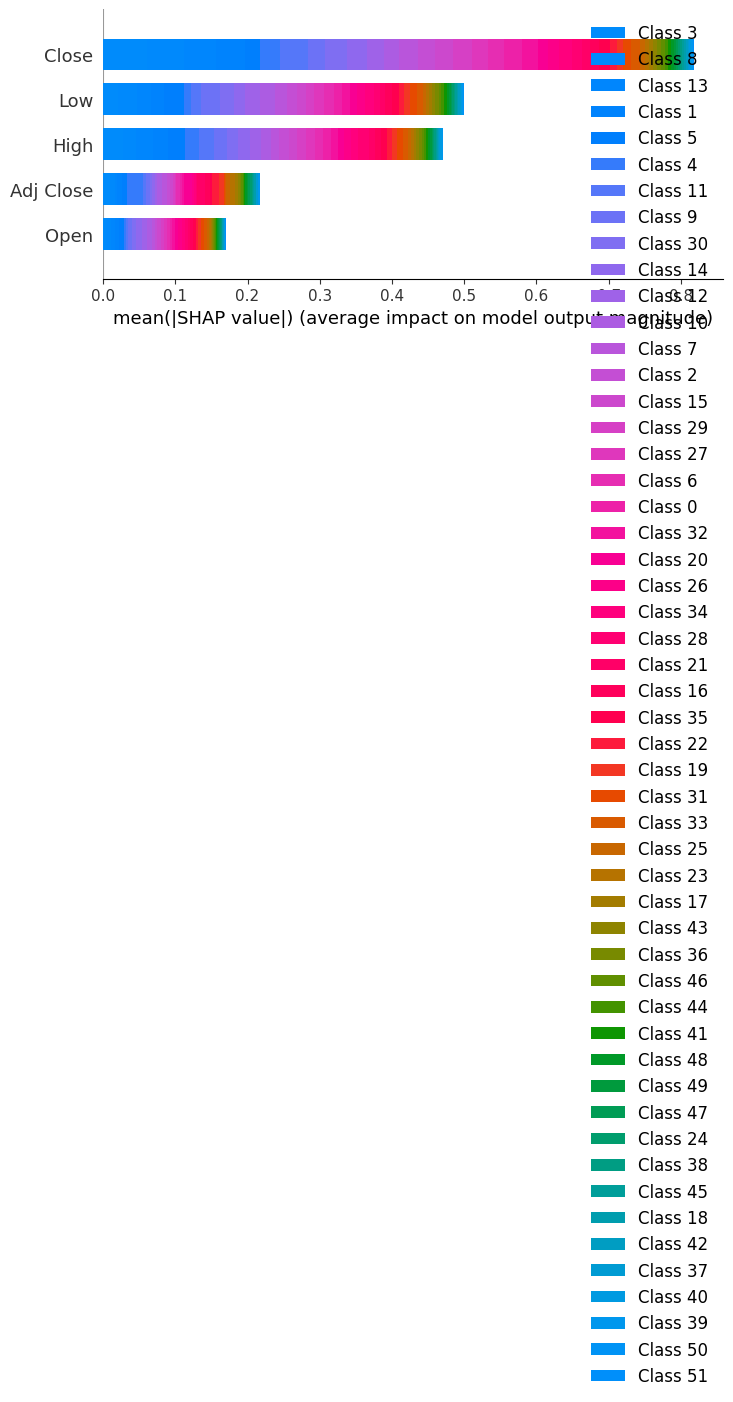

In [48]:
shap.summary_plot(shap_values, x_test)